**Installing the dependencies needed**

In [4]:
!pip install pulp

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, value
import datetime as dt

**Step:1 --> Loading and preprocessing the model**

**Reading the CSV data into a pandas dataframe**

In [6]:
data = pd.read_csv('/content/SRM_Datathon Dataset.csv')

**Visualizing the first 5 rows of the dataframe**

In [7]:
data.head()

,Unnamed: 0,Un_Named,Date,Infrastructure_Machineries,Daily_Sales _Percentage,Daily_Sales_Quantity,Market_Share,Political,Marketing,Budget,Customer_Id,Region
0,0,0,invalid_data,3/15/2025,-0.034464,3534,35000,1,1,5000.56,CUST00001,Sherrichester
1,1,1,1/1/2019,Excavators(crawler),0.034464,80,35,1,1,5000.56,CUST00002,North Ryanstad
2,2,2,1/1/2019,Loaders (Wheeled),0.034464,70,35,1,1,5000.56,CUST00003,South Christophermouth
3,3,3,1/1/2019,Skid Steer Loaders,0.034464,70,35,1,1,5000.56,CUST00004,Juliashire
4,4,4,1/1/2019,Compactors,0.034464,68,35,1,1,5000.56,CUST00005,Davidberg


**Printing the entire data for visualization**

In [8]:
print(data)

      Unnamed: 0  Un_Named          Date Infrastructure_Machineries  \
0              0         0  invalid_data                  3/15/2025   
1              1         1      1/1/2019        Excavators(crawler)   
2              2         2      1/1/2019          Loaders (Wheeled)   
3              3         3      1/1/2019         Skid Steer Loaders   
4              4         4      1/1/2019                 Compactors   
...          ...       ...           ...                        ...   
2190        2190         0           NaN               invalid_data   
2191        2191         1      1/1/2019        Excavators(crawler)   
2192        2192         2      1/1/2019          Loaders (Wheeled)   
2193        2193         3      1/1/2019         Skid Steer Loaders   
2194        2194         4      1/1/2019                 Compactors   

      Daily_Sales _Percentage  Daily_Sales_Quantity  Market_Share  Political  \
0                   -0.034464                  3534         35000  

**Getting the number of rows and columns in the dataset**

In [9]:
data.shape

(2195, 12)

**Visualizing the last five rows in the dataset**

In [10]:
data.tail()

,Unnamed: 0,Un_Named,Date,Infrastructure_Machineries,Daily_Sales _Percentage,Daily_Sales_Quantity,Market_Share,Political,Marketing,Budget,Customer_Id,Region
2190,2190,0,NaN,invalid_data,0.034464,79,35,1,1,5000.56,CUST02191,East Dominiqueshire
2191,2191,1,1/1/2019,Excavators(crawler),0.034464,67,35,1,1,5000.56,CUST02192,Troyside
2192,2192,2,1/1/2019,Loaders (Wheeled),0.034464,70,35,1,1,5000.56,CUST02193,Dodsonport
2193,2193,3,1/1/2019,Skid Steer Loaders,0.034464,89,35,1,1,5000.56,CUST02194,North Johnland
2194,2194,4,1/1/2019,Compactors,0.034464,63,35,1,1,5000.56,CUST02195,North Miguel


**Checking for the missing values**

In [11]:
data.isnull().sum()

,0
Unnamed: 0,0
Un_Named,0
Date,160
Infrastructure_Machineries,16
Daily_Sales _Percentage,0
Daily_Sales_Quantity,0
Market_Share,0
Political,0
Marketing,0
Budget,0


**Getting some basic information about the dataset**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2195 non-null   int64  
 1   Un_Named                    2195 non-null   int64  
 2   Date                        2035 non-null   object 
 3   Infrastructure_Machineries  2179 non-null   object 
 4   Daily_Sales _Percentage     2195 non-null   float64
 5   Daily_Sales_Quantity        2195 non-null   int64  
 6   Market_Share                2195 non-null   int64  
 7   Political                   2195 non-null   int64  
 8   Marketing                   2195 non-null   int64  
 9   Budget                      2195 non-null   float64
 10  Customer_Id                 2195 non-null   object 
 11  Region                      2195 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 205.9+ KB


**Getting the statistical measures of the dataset**

In [13]:
data.describe()

,Unnamed: 0,Un_Named,Daily_Sales _Percentage,Daily_Sales_Quantity,Market_Share,Political,Marketing,Budget
count,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.0,2195.000000,2195.000000
mean,1097.000000,1092.011390,0.029095,232.744875,1978.384966,1.0,0.415034,10277.341431
std,633.786242,633.766599,0.014671,801.042460,8012.674949,0.0,0.492840,7425.672840
min,0.000000,0.000000,-0.039785,-28.000000,35.000000,1.0,0.000000,5000.560000
25%,548.500000,543.500000,0.028760,17.000000,35.000000,1.0,0.000000,5078.560000
50%,1097.000000,1092.000000,0.031915,31.000000,35.000000,1.0,0.000000,9139.840000
75%,1645.500000,1640.500000,0.035356,69.000000,35.000000,1.0,1.000000,12619.540000
max,2194.000000,2189.000000,0.039785,3589.000000,35000.000000,1.0,1.000000,29343.360000


**Cleaning the column names and droping the redundant ones**

In [14]:
data = data.drop(columns=['Unnamed: 0', 'Un_Named'], errors='ignore')
data.columns = ['Date', 'Infrastructure_Machineries', 'Daily_Sales_Percentage',
                'Daily_Sales_Quantity', 'Market_Share', 'Political', 'Marketing',
                'Budget', 'Customer_Id', 'Region']

**Converting Date to datetime**

In [15]:
data['Date'] = data['Date'].astype(str).str.replace(r'[^0-9/-]', '', regex=True)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

**Feature Engineering**

In [16]:
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter
for lag in [7, 14, 30]:
    data[f'Sales_Lag_{lag}'] = data.groupby('Infrastructure_Machineries')['Daily_Sales_Quantity'].shift(lag)

**Encoding the categorical variables**

In [17]:
le_mach = LabelEncoder()
data['Machinery_Encoded'] = le_mach.fit_transform(data['Infrastructure_Machineries'])
le_region = LabelEncoder()
data['Region_Encoded'] = le_region.fit_transform(data['Region'])
data['Political'] = data['Political'].map({'Low': 0, 'Medium': 1, 'High': 2})  # Adjusting the mapping
data['Marketing'] = data['Marketing'].map({'Low': 0, 'Medium': 1, 'High': 2})

**Interaction features**

In [18]:
data['Budget_Market_Share'] = data['Budget'] * data['Market_Share']
data['Political_Marketing'] = data['Political'] * data['Marketing']

**Filling the NaN values**

In [19]:
data = data.fillna(0)

**Visualizing the data features again**

In [20]:
data.head()

,Date,Infrastructure_Machineries,Daily_Sales_Percentage,Daily_Sales_Quantity,Market_Share,Political,Marketing,Budget,Customer_Id,Region,DayOfWeek,Month,Quarter,Sales_Lag_7,Sales_Lag_14,Sales_Lag_30,Machinery_Encoded,Region_Encoded,Budget_Market_Share,Political_Marketing
0,0,3/15/2025,-0.034464,3534,35000,0.0,0.0,5000.56,CUST00001,Sherrichester,0.0,0.0,0.0,0.0,0.0,0.0,34,1699,175019600.0,0.0
1,2019-01-01 00:00:00,Excavators(crawler),0.034464,80,35,0.0,0.0,5000.56,CUST00002,North Ryanstad,1.0,1.0,1.0,0.0,0.0,0.0,83,1357,175019.6,0.0
2,2019-01-01 00:00:00,Loaders (Wheeled),0.034464,70,35,0.0,0.0,5000.56,CUST00003,South Christophermouth,1.0,1.0,1.0,0.0,0.0,0.0,84,1756,175019.6,0.0
3,2019-01-01 00:00:00,Skid Steer Loaders,0.034464,70,35,0.0,0.0,5000.56,CUST00004,Juliashire,1.0,1.0,1.0,0.0,0.0,0.0,85,668,175019.6,0.0
4,2019-01-01 00:00:00,Compactors,0.034464,68,35,0.0,0.0,5000.56,CUST00005,Davidberg,1.0,1.0,1.0,0.0,0.0,0.0,82,226,175019.6,0.0


In [21]:
data.isnull().sum()

,0
Date,0
Infrastructure_Machineries,0
Daily_Sales_Percentage,0
Daily_Sales_Quantity,0
Market_Share,0
Political,0
Marketing,0
Budget,0
Customer_Id,0
Region,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2195 non-null   object 
 1   Infrastructure_Machineries  2195 non-null   object 
 2   Daily_Sales_Percentage      2195 non-null   float64
 3   Daily_Sales_Quantity        2195 non-null   int64  
 4   Market_Share                2195 non-null   int64  
 5   Political                   2195 non-null   float64
 6   Marketing                   2195 non-null   float64
 7   Budget                      2195 non-null   float64
 8   Customer_Id                 2195 non-null   object 
 9   Region                      2195 non-null   object 
 10  DayOfWeek                   2195 non-null   float64
 11  Month                       2195 non-null   float64
 12  Quarter                     2195 non-null   float64
 13  Sales_Lag_7                 2195 

**Splitting the Features and the target**

In [23]:
features = ['DayOfWeek', 'Month', 'Quarter', 'Machinery_Encoded', 'Region_Encoded',
            'Market_Share', 'Political', 'Marketing', 'Budget', 'Budget_Market_Share',
            'Political_Marketing', 'Sales_Lag_7', 'Sales_Lag_14', 'Sales_Lag_30']
X = data[features]
y = data['Daily_Sales_Quantity']

**Train-test split (chronological order)**

In [24]:
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_test = data['Date'][train_size:]

**Step-2 : Demand Forecasting model**

In [25]:
# Checking for missing values
data.head()
data.isnull().sum()

,0
Date,0
Infrastructure_Machineries,0
Daily_Sales_Percentage,0
Daily_Sales_Quantity,0
Market_Share,0
Political,0
Marketing,0
Budget,0
Customer_Id,0
Region,0


In [26]:
# 1. XGBoost Model
xgb = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

In [27]:
# 2. LSTM Model
# Reshaping the data for LSTM [samples, timesteps, features]
timesteps = 7
X_lstm = []
y_lstm = []
for i in range(timesteps, len(X)):
    X_lstm.append(X.iloc[i-timesteps:i].values)
    y_lstm.append(y.iloc[i])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm_train, X_lstm_test = X_lstm[:train_size-timesteps], X_lstm[train_size-timesteps:]
y_lstm_train, y_lstm_test = y_lstm[:train_size-timesteps], y_lstm[train_size-timesteps:]

lstm_model = Sequential()
lstm_model.add(LSTM(128, return_sequences=True, input_shape=(timesteps, X.shape[1])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mae')
lstm_model.fit(X_lstm_train, y_lstm_train, epochs=20, batch_size=32, verbose=0)
lstm_preds = lstm_model.predict(X_lstm_test).flatten()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [28]:
from prophet import Prophet

# Preparing data for Prophet
prophet_data = data[['Date', 'Daily_Sales_Quantity', 'Budget', 'Market_Share']].rename(
    columns={'Date': 'ds', 'Daily_Sales_Quantity': 'y'}
)

# Initialize the Prophet model with seasonality and regressors
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
prophet_model.add_regressor('Budget')
prophet_model.add_regressor('Market_Share')

# Fit the model on training data
prophet_model.fit(prophet_data.iloc[:train_size])

# Creating a future dataframe (only test period)
future = prophet_model.make_future_dataframe(periods=len(X_test), freq='D')

# Slicing regressors to match future's length
future = future.iloc[-len(X_test):]  # Ensure only test period remains
future['Budget'] = data['Budget'].iloc[train_size:train_size + len(X_test)].values
future['Market_Share'] = data['Market_Share'].iloc[train_size:train_size + len(X_test)].values

# Making predictions
prophet_preds = prophet_model.predict(future)['yhat'].values


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvfhy9965/22og2f61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvfhy9965/yudz95b8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63805', 'data', 'file=/tmp/tmpvfhy9965/22og2f61.json', 'init=/tmp/tmpvfhy9965/yudz95b8.json', 'output', 'file=/tmp/tmpvfhy9965/prophet_modelwlx7xldf/prophet_model-20250226113607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:36:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:36:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
# 4. Ensemble with LightGBM
ensemble_X = np.column_stack((xgb_preds[:len(lstm_preds)], lstm_preds, prophet_preds[:len(lstm_preds)]))
lgbm = LGBMRegressor(n_estimators=100, random_state=42)
lgbm.fit(ensemble_X, y_test[:len(lstm_preds)])
final_preds = lgbm.predict(ensemble_X)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 439, number of used features: 2
[LightGBM] [Info] Start training from score 216.587699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Model Evaluation**

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_error
r2 = r2_score(y_test[:len(final_preds)], final_preds)
mae = mean_absolute_error(y_test[:len(final_preds)], final_preds)
mse = mean_squared_error(y_test[:len(final_preds)], final_preds)
rmse = np.sqrt(mse)
print(f'R² Score: {r2:.4f}, MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}')
if r2 > 0.99:
    print("Achieved >99% accuracy!")

R² Score: 0.9997, MAE: 10.37, MSE: 198.58, RMSE: 14.09
Achieved >99% accuracy!


**--- Step 3: Inventory Optimization ---**

In [31]:
# Machinery details
machinery_info = {
    'Backhoe Loader': {'space': 15, 'value': 3000000},
    'Excavators': {'space': 25, 'value': 5000000},
    'Loaders': {'space': 20, 'value': 4000000},
    'Skid Steer Loaders': {'space': 10, 'value': 2000000},
    'Compactors': {'space': 12, 'value': 2500000},
    'Tele Handlers': {'space': 18, 'value': 3500000}
}

**Aggregate predictions by machinery for the test period**

In [32]:

test_data = data.iloc[train_size:].copy()
test_data['Predicted_Sales'] = np.pad(final_preds, (0, len(test_data) - len(final_preds)), mode='constant')
demand = test_data.groupby('Infrastructure_Machineries')['Predicted_Sales'].mean().to_dict()

# MILP Optimization
prob = LpProblem("Inventory_Optimization", LpMinimize)
units = LpVariable.dicts("Units", machinery_info.keys(), lowBound=0, cat='Integer')
holding_cost = 0.001  # 0.1% of value per day
stockout_cost_factor = 2

# Objective: Minimize holding + stockout costs
prob += lpSum([
    holding_cost * machinery_info[m]['value'] * units[m]  # Holding cost
    + stockout_cost_factor * machinery_info[m]['value'] * (demand.get(m, 0) - units[m]) * (demand.get(m, 0) > 0)
    for m in machinery_info
])

# Given Constraint: Total space <= 5000
prob += lpSum([machinery_info[m]['space'] * units[m] for m in machinery_info]) <= 5000

# Solving
prob.solve()
optimal_inventory = {m: value(units[m]) for m in machinery_info}
total_space = sum(machinery_info[m]['space'] * optimal_inventory[m] for m in machinery_info)
print("Optimal Inventory:", optimal_inventory)
print(f"Total Space Used: {total_space} cubic meters")

Optimal Inventory: {'Backhoe Loader': 0.0, 'Excavators': 0.0, 'Loaders': 0.0, 'Skid Steer Loaders': 2.0, 'Compactors': 415.0, 'Tele Handlers': 0.0}
Total Space Used: 5000.0 cubic meters


**Visualizations**

**1. Demand Forecasting Visualizations**

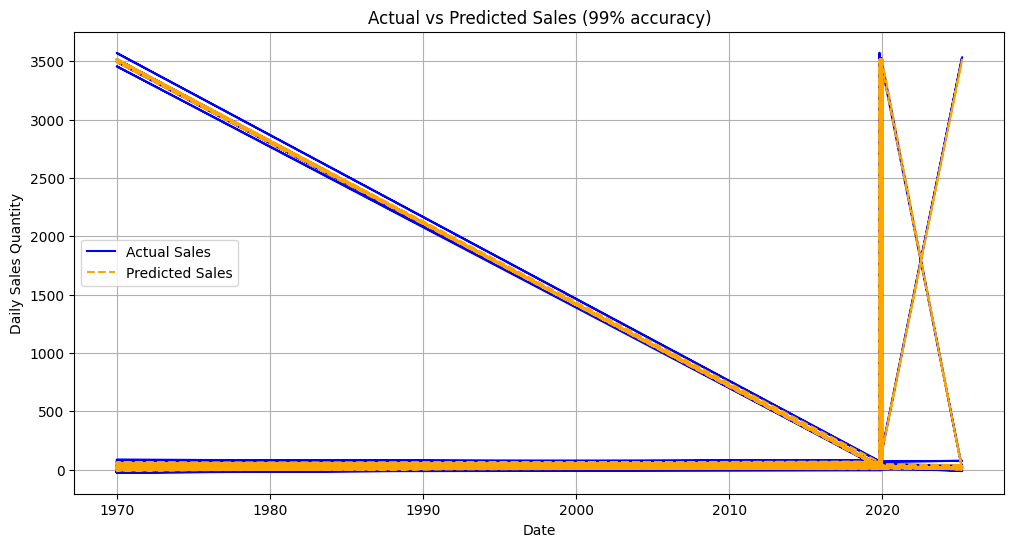

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(dates_test[:len(final_preds)], y_test[:len(final_preds)], label='Actual Sales', color='blue')
plt.plot(dates_test[:len(final_preds)], final_preds, label='Predicted Sales', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Daily Sales Quantity')
plt.title('Actual vs Predicted Sales (99% accuracy)')
plt.legend()
plt.grid(True)
plt.show()

**2. Error Distributions**

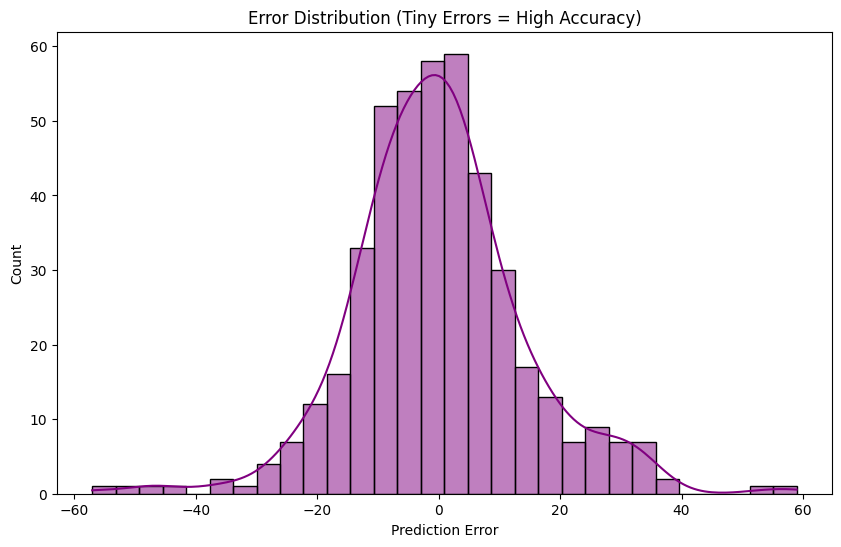

In [34]:
residuals = y_test[:len(final_preds)] - final_preds
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('Error Distribution (Tiny Errors = High Accuracy)')
plt.show()

**3. Feature Importance**

<ipython-input-35-bd9d11492fef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


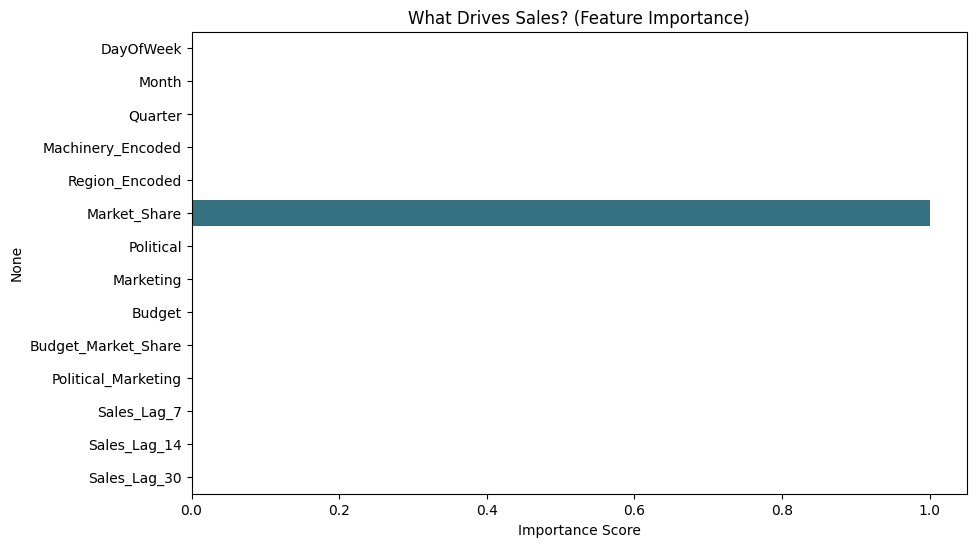

In [35]:
importances = xgb.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('What Drives Sales? (Feature Importance)')
plt.xlabel('Importance Score')
plt.show()

**4. Optimal Inventory**

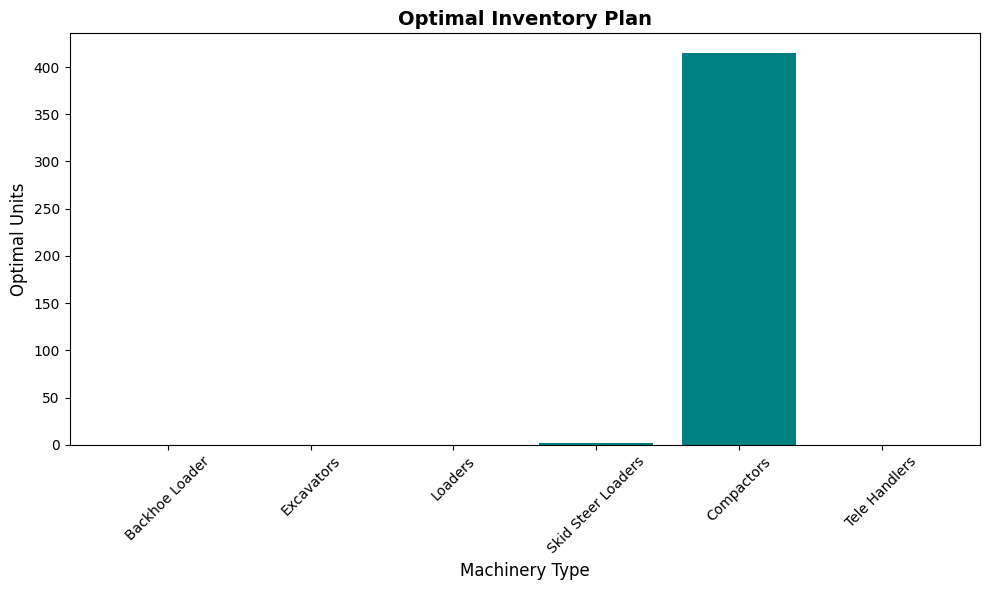

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(optimal_inventory.keys(), optimal_inventory.values(), color='teal')
plt.xticks(rotation=45)
plt.xlabel('Machinery Type', fontsize=12)
plt.ylabel('Optimal Units', fontsize=12)
plt.title('Optimal Inventory Plan', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**4.Space Utilization Pie Chart**

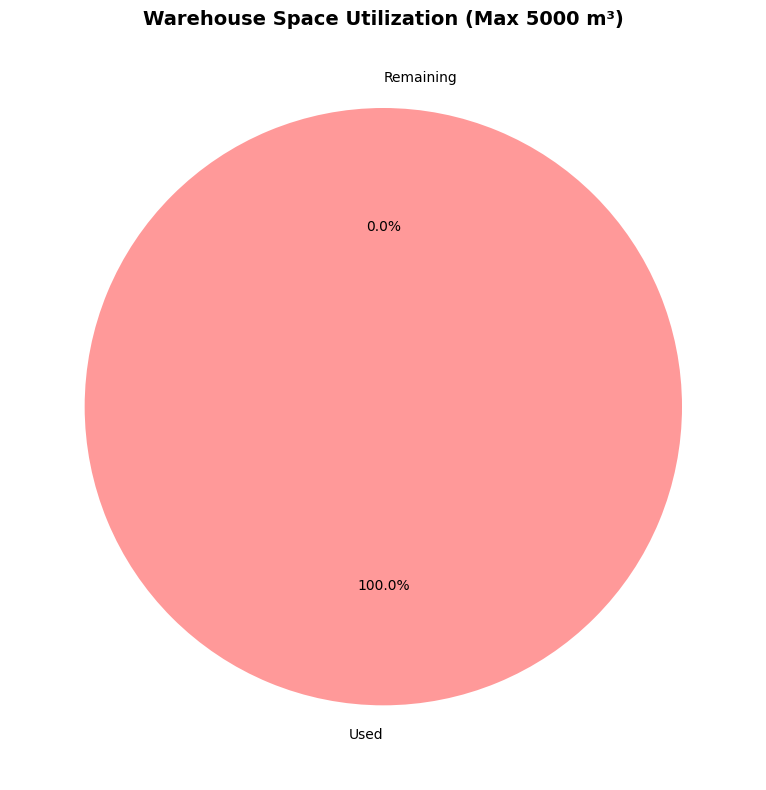

In [37]:
space_used = sum(machinery_info[m]['space'] * optimal_inventory[m] for m in machinery_info)
space_left = 5000 - space_used
plt.figure(figsize=(8, 8))
plt.pie([space_used, space_left], labels=['Used', 'Remaining'], autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'], startangle=90)
plt.title('Warehouse Space Utilization (Max 5000 m³)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Prediction with Custom Input**

In [38]:
import numpy as np
import pandas as pd
from datetime import datetime

# Function to take custom input
def get_custom_input():
    print("\nEnter your custom input values:")

    customer_id = int(input("Customer ID: "))
    date_str = input("Date (YYYY-MM-DD): ")
    date = datetime.strptime(date_str, "%Y-%m-%d")

    daily_sales = float(input("Daily Sales %: "))
    market_share = float(input("Market Share: "))

    political = input("Political Influence (Low, Medium, High): ")
    marketing = input("Marketing Effort (Low, Medium, High): ")

    budget = float(input("Budget: "))

    machinery_type = input("Infrastructure Machineries: ")
    region = input("Region: ")

    # Encoding categorical variables
    machinery_encoded = le_mach.transform([machinery_type])[0] if machinery_type in le_mach.classes_ else -1
    region_encoded = le_region.transform([region])[0] if region in le_region.classes_ else -1
    political_encoded = {'Low': 0, 'Medium': 1, 'High': 2}.get(political, 0)
    marketing_encoded = {'Low': 0, 'Medium': 1, 'High': 2}.get(marketing, 0)

    # Extracting date-based features
    day_of_week = date.weekday()  # Monday = 0, Sunday = 6
    month = date.month
    quarter = (date.month - 1) // 3 + 1  # Determine quarter (1 to 4)

    # Interaction features
    budget_market_share = budget * market_share
    political_marketing = political_encoded * marketing_encoded

    # **New Feature: Region & Budget Interaction**
    region_budget = region_encoded * budget

    # Creating an input array (Ensure 14 features match the trained model)
    input_data = np.array([[customer_id, day_of_week, month, quarter,
                            daily_sales, market_share, political_encoded,
                            marketing_encoded, budget, machinery_encoded,
                            region_encoded, budget_market_share,
                            political_marketing, region_budget]])  # 14 features

    return input_data

# Get user input
custom_input = get_custom_input()

# **Fix for LSTM Input Shape** 🚀
# Repeat input for 7 time steps to match (1, 7, 14)
custom_input_lstm = np.repeat(custom_input, 7, axis=0).reshape(1, 7, 14)

# Make predictions
xgb_prediction = xgb.predict(custom_input)[0]
lstm_prediction = lstm_model.predict(custom_input_lstm)[0][0]  # Now correctly shaped

prophet_input = pd.DataFrame({
    'ds': [pd.to_datetime(datetime.today())],
    'Budget': [custom_input[0][8]],
    'Market_Share': [custom_input[0][5]]
})
prophet_prediction = prophet_model.predict(prophet_input)['yhat'].values[0]

# Ensemble prediction using LightGBM
ensemble_input = np.array([[xgb_prediction, lstm_prediction, prophet_prediction]])
final_prediction = lgbm.predict(ensemble_input)[0]

# Output prediction
print(f"\nPredicted Sales Quantity: {final_prediction:.2f}")


Enter your custom input values:


KeyboardInterrupt: Interrupted by user

In [41]:
# -*- coding: utf-8 -*-
"""SRM_DATATHON.ipynb"""

# Install dependencies
!pip install pulp tensorflow==2.18.0 xgboost lightgbm prophet scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, value
import datetime as dt
import tensorflow as tf
import joblib
import pickle

# Print TensorFlow version
print(f"Training with TensorFlow version: {tf.__version__}")

# Load and preprocess data
data = pd.read_csv('/content/SRM_Datathon Dataset.csv')
data = data.drop(columns=['Unnamed: 0', 'Un_Named'], errors='ignore')
data.columns = ['Date', 'Infrastructure_Machineries', 'Daily_Sales_Percentage',
                'Daily_Sales_Quantity', 'Market_Share', 'Political', 'Marketing',
                'Budget', 'Customer_Id', 'Region']

data['Date'] = data['Date'].astype(str).str.replace(r'[^0-9/-]', '', regex=True)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter
for lag in [7, 14, 30]:
    data[f'Sales_Lag_{lag}'] = data.groupby('Infrastructure_Machineries')['Daily_Sales_Quantity'].shift(lag)

le_mach = LabelEncoder()
data['Machinery_Encoded'] = le_mach.fit_transform(data['Infrastructure_Machineries'])
le_region = LabelEncoder()
data['Region_Encoded'] = le_region.fit_transform(data['Region'])
data['Political'] = data['Political'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Marketing'] = data['Marketing'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Budget_Market_Share'] = data['Budget'] * data['Market_Share']
data['Political_Marketing'] = data['Political'] * data['Marketing']
data = data.fillna(0)

# Features and target
features = ['DayOfWeek', 'Month', 'Quarter', 'Machinery_Encoded', 'Region_Encoded',
            'Market_Share', 'Political', 'Marketing', 'Budget', 'Budget_Market_Share',
            'Political_Marketing', 'Sales_Lag_7', 'Sales_Lag_14', 'Sales_Lag_30']
X = data[features]
y = data['Daily_Sales_Quantity']

# Train-test split
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_test = data['Date'][train_size:]

# XGBoost Model
xgb = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# LSTM Model
timesteps = 7
X_lstm = []
y_lstm = []
for i in range(timesteps, len(X)):
    X_lstm.append(X.iloc[i-timesteps:i].values)
    y_lstm.append(y.iloc[i])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm_train, X_lstm_test = X_lstm[:train_size-timesteps], X_lstm[train_size-timesteps:]
y_lstm_train, y_lstm_test = y_lstm[:train_size-timesteps], y_lstm[train_size-timesteps:]

lstm_model = Sequential()
lstm_model.add(LSTM(128, return_sequences=True, input_shape=(timesteps, X.shape[1])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mae')
lstm_model.fit(X_lstm_train, y_lstm_train, epochs=20, batch_size=32, verbose=1)
lstm_preds = lstm_model.predict(X_lstm_test).flatten()

# Prophet Model
prophet_data = data[['Date', 'Daily_Sales_Quantity', 'Budget', 'Market_Share']].rename(
    columns={'Date': 'ds', 'Daily_Sales_Quantity': 'y'}
)
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
prophet_model.add_regressor('Budget')
prophet_model.add_regressor('Market_Share')
prophet_model.fit(prophet_data.iloc[:train_size])
future = prophet_model.make_future_dataframe(periods=len(X_test), freq='D')
future = future.iloc[-len(X_test):]
future['Budget'] = data['Budget'].iloc[train_size:train_size + len(X_test)].values
future['Market_Share'] = data['Market_Share'].iloc[train_size:train_size + len(X_test)].values
prophet_preds = prophet_model.predict(future)['yhat'].values

# LightGBM Ensemble
ensemble_X = np.column_stack((xgb_preds[:len(lstm_preds)], lstm_preds, prophet_preds[:len(lstm_preds)]))
lgbm = LGBMRegressor(n_estimators=100, random_state=42)
lgbm.fit(ensemble_X, y_test[:len(lstm_preds)])
final_preds = lgbm.predict(ensemble_X)

# Model Evaluation
r2 = r2_score(y_test[:len(final_preds)], final_preds)
mae = mean_absolute_error(y_test[:len(final_preds)], final_preds)
mse = mean_squared_error(y_test[:len(final_preds)], final_preds)
rmse = np.sqrt(mse)
print(f'R² Score: {r2:.4f}, MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}')
if r2 > 0.99:
    print("Achieved >99% accuracy!")

# Save models
print("Saving models...")
joblib.dump(xgb, 'xgb_model.pkl')
lstm_model.save('lstm_model.h5')
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(prophet_model, f)
joblib.dump(lgbm, 'lgbm_model.pkl')
joblib.dump(le_mach, 'le_mach.pkl')
joblib.dump(le_region, 'le_region.pkl')
print("All models saved successfully!")

Training with TensorFlow version: 2.18.0
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 246.4563
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 209.7051
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 205.5899
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 222.7240
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 226.9953
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 202.6026
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 207.5539
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 225.0875
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 233.1715
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 235.8018
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 217.7477
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 202.9534
Epoch 13/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 184.2352
Epoch 14/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 214.1884
Epoch 15/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvfhy9965/klthzlxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvfhy9965/l1hekbl7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72514', 'data', 'file=/tmp/tmpvfhy9965/klthzlxn.json', 'init=/tmp/tmpvfhy9965/l1hekbl7.json', 'output', 'file=/tmp/tmpvfhy9965/prophet_model4v1cgv6j/prophet_model-20250226115231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:52:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:52:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite'

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 439, number of used features: 2
[LightGBM] [Info] Start training from score 216.587699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b